In [1]:
# Import necessary libraries
import requests as req

#import shapely.geometry as geom


In [2]:
url = "http://loc.geopunt.be/geolocation/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Sint-Antoniusplein 19, 2910 Essen"
url = "https://loc.geopunt.be/v4/suggestion?q=Hofstraat 37, 2910 Essen"
url = "https://loc.geopunt.be/v4/suggestion?q=Elzendreef 14, 2910 Essen"

response = req.get(url)

# Here the response format is a json file, it is used as a dictionary
print(response.json())

{'SuggestionResult': ['Elzendreef 14, 2910 Essen']}


In [11]:
print(response)


None


In [3]:
# url = "http://loc.geopunt.be/geolocation/suggestion?q=Kouter 26"
# url = "http://loc.geopunt.be/geolocation/v4/suggestion?q=Kouter 26, 9000 Gent"
# # url = "http://loc.geopunt.be/geolocation/v4/suggestion?trambergstraat%201"
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"

url = f"https://loc.geopunt.be/v4/Location?q={address}"


response = req.get(url)
response = response.json()


# Here the response format is a json file, it is used as a dictionary
print(response)


#GET v4/Suggestion?q={q}&c={c}
 

{'LocationResult': [{'Municipality': 'Essen', 'Zipcode': '2910', 'Thoroughfarename': 'Sint-Antoniusplein', 'Housenumber': '19', 'ID': 1530410, 'FormattedAddress': 'Sint-Antoniusplein 19, 2910 Essen', 'Location': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'LocationType': 'crab_huisnummer_afgeleidVanGebouw', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'UpperRight': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}}}]}


In [4]:
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"
# address = "Limburgstraat 14, 9000 Gent"
address = "Hofstraat 37, 2910 Essen"
address = "Elzendreef 14, 2910 Essen"

req = req.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
info = {'address' : address, 
        'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
        'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
        'street' : req['LocationResult'][0]['Thoroughfarename'],
        'house_number' : req['LocationResult'][0]['Housenumber'], 
        'postcode': req['LocationResult'][0]['Zipcode'], 
        'municipality' : req['LocationResult'][0]['Municipality']}
    
detail = req.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch",
                      params={"postcode": info['postcode'], 
                      "straatnaam": info['street'],
                      "huisnummer": info['house_number']}).json()
building = req.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = req.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]


TypeError: get() takes no keyword arguments

In [5]:
req

{'LocationResult': [{'Municipality': 'Essen',
   'Zipcode': '2910',
   'Thoroughfarename': 'Elzendreef',
   'Housenumber': '14',
   'ID': 1219931,
   'FormattedAddress': 'Elzendreef 14, 2910 Essen',
   'Location': {'Lat_WGS84': 51.45553140760153,
    'Lon_WGS84': 4.439196884648804,
    'X_Lambert72': 154896.23,
    'Y_Lambert72': 238435.79},
   'LocationType': 'crab_huisnummer_afgeleidVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.45553140760153,
     'Lon_WGS84': 4.439196884648804,
     'X_Lambert72': 154896.23,
     'Y_Lambert72': 238435.79},
    'UpperRight': {'Lat_WGS84': 51.45553140760153,
     'Lon_WGS84': 4.439196884648804,
     'X_Lambert72': 154896.23,
     'Y_Lambert72': 238435.79}}}]}

In [6]:
info

{'address': 'Elzendreef 14, 2910 Essen',
 'x_value': 154896.23,
 'y_value': 238435.79,
 'street': 'Elzendreef',
 'house_number': '14',
 'postcode': '2910',
 'municipality': 'Essen'}

In [7]:
# Plot polygon
poly_building = info['polygon'][0]['coordinates'][0]
poly_building

KeyError: 'polygon'

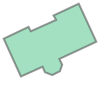

In [93]:
geom.Polygon(poly_building)